### Example notebook to:
- download detection data from hugging face (create_spectrogram_pkl)
- load audio data and converts them to a form suitable for spectrogram display (create_spectrogram_pkl)
- save this audio data, together with event label, onset and offset timings into a pickle file (create_spectrogram_pkl)
- function to display spectrogram and label onset/offset (display_spectrogram)

In [1]:
import os
import sys
import pandas as pd
import pickle

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.utils.audio_to_spectrograms import *

In [2]:
create_spectrogram_pkl()

2025-11-30 23:38:22.761 | INFO     | src.utils.audio_to_spectrograms:download_detection_dataset:27 - Detection dataset already downloaded
2025-11-30 23:38:22.769 | INFO     | src.utils.audio_to_spectrograms:create_spectrogram_pkl:141 - Creating YAMNet dataset files...
2025-11-30 23:38:22.793 | INFO     | src.utils.audio_to_spectrograms:get_wav_files:94 - Getting train spectrograms for 500 files in data/processed/detection/train...
Getting spectrograms: 100%|██████████| 500/500 [01:22<00:00,  6.09it/s]
2025-11-30 23:39:44.937 | INFO     | src.utils.audio_to_spectrograms:get_wav_files:100 - Exporting train spectrograms to data/processed/yamnet...
2025-11-30 23:39:46.419 | INFO     | src.utils.audio_to_spectrograms:get_wav_files:94 - Getting test spectrograms for 500 files in data/processed/detection/test...
Getting spectrograms: 100%|██████████| 500/500 [01:05<00:00,  7.59it/s]
2025-11-30 23:40:52.337 | INFO     | src.utils.audio_to_spectrograms:get_wav_files:100 - Exporting test spectro

In [4]:
data = pickle.load(open('data/processed/yamnet/spectrograms_train.pkl', 'rb'))
data.keys()

dict_keys(['sr', 'S_db', 'files', 'onset', 'offset', 'event_label', 'background_label'])

In [8]:
data_events = pickle.load(open('data/processed/yamnet/spectrograms_train_list.pkl', 'rb'))
data_events[:2]

[{'file': 'train_scene_0000.wav',
  'file_path': 'data/processed/detection/train/train_scene_0000.wav',
  'S_db': array([[-25.849232, -25.220993, -30.916374, ..., -36.11365 , -40.931057,
          -38.25724 ],
         [-29.53211 , -27.774826, -28.580708, ..., -37.051662, -39.671844,
          -37.08787 ],
         [-24.137798, -25.833609, -29.48297 , ..., -33.521576, -36.285942,
          -34.412994],
         ...,
         [-66.96039 , -72.13574 , -80.      , ..., -80.      , -80.      ,
          -80.      ],
         [-67.06068 , -72.00502 , -80.      , ..., -80.      , -80.      ,
          -80.      ],
         [-67.94165 , -73.75583 , -80.      , ..., -80.      , -80.      ,
          -80.      ]], shape=(64, 862), dtype=float32),
  'onset': np.float64(1.4041677639819286),
  'offset': np.float64(4.726273878383591),
  'event_label': 'siren',
  'background_label': 'forest',
  'sr': 44100},
 {'file': 'train_scene_0001.wav',
  'file_path': 'data/processed/detection/train/train_scene

2: cough in airport


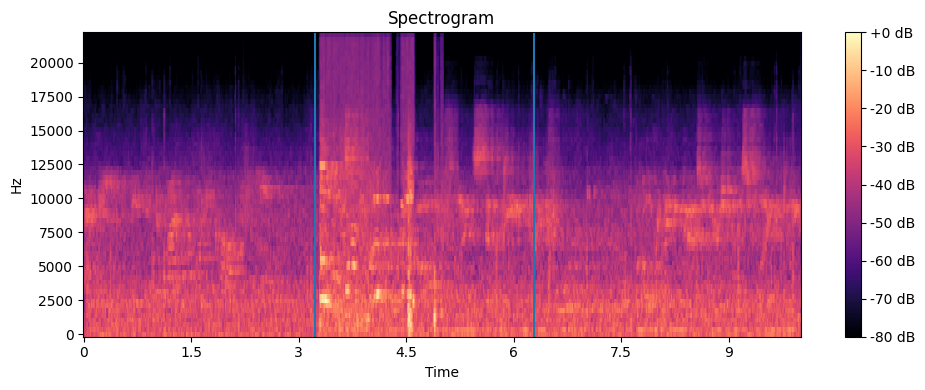

In [9]:
i = 2
event = data_events[i]
print(f'{i}: {event['event_label']} in {event['background_label']}')
display_spectrogram(event['S_db'], sr = event['sr'], onset = event['onset'], offset = event['offset'])